In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import glob
import os

import pandas as pd
import xarray as xr
import pyomo.core as po
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import calliope
from calliope.core.util.dataset import split_loc_techs

idx = pd.IndexSlice

In [3]:
calliope.set_log_verbosity()

In [4]:
tech_groups = {
    'heat_techs': [
        "methane_boiler", "biofuel_boiler",
        "hp", "electric_heater",
        "electric_hob", "gas_hob",
        "chp_biofuel_extraction", "chp_methane_extraction", "chp_wte_back_pressure"
    ],

    'supply_techs': [
        "hydro_run_of_river", "hydro_reservoir", "nuclear", 
         "ccgt", "roof_mounted_pv", "open_field_pv", 
         "wind_offshore", "wind_onshore_competing", "wind_onshore_monopoly"
    ],

    'p2x_techs': [
        "biofuel_to_liquids", "hydrogen_to_liquids", "biofuel_to_diesel", 
        "biofuel_to_gas_and_liquids", "biofuel_to_methanol", "hydrogen_to_methanol",
        "biofuel_to_methane", "hydrogen_to_methane", "electrolysis", "dac",
    ],

    'storage_techs': [
        "hydrogen_storage",
        "battery",
        "pumped_hydro",
        "methane_heat_storage_small",
        "biofuel_heat_storage_small",
        "hp_heat_storage_small",
        "electric_heater_heat_storage_small",
        "chp_biofuel_extraction_heat_storage_big",
        "chp_methane_extraction_heat_storage_big",
        "chp_wte_back_pressure_heat_storage_big",
    ],

    'transmission_techs': [
        "dc_ohl_transmission",
        "dc_subsea_transmission",
        "dc_underground_transmission",
        "ac_ohl_transmission",
        "ac_ohl_mountain_transmission",
    ],

    'transport_techs': [
        "heavy_transport_ice",
        "light_transport_ice",
        "heavy_transport_ev",
        "light_transport_ev",
    ]
}

In [5]:
model_files = glob.glob('../outputs/model_out_12h_fixed_weekly/*.nc')
models = {os.path.basename(model_file).replace("spore_", "").replace(".nc", ""): calliope.read_netcdf(model_file) for model_file in model_files}

[2021-03-12 12:09:12] INFO     Model: initialising
[2021-03-12 12:09:12] INFO     Model: loaded model_data
[2021-03-12 12:09:15] INFO     Model: initialising
[2021-03-12 12:09:15] INFO     Model: loaded model_data
[2021-03-12 12:09:20] INFO     Model: initialising
[2021-03-12 12:09:20] INFO     Model: loaded model_data
[2021-03-12 12:09:23] INFO     Model: initialising
[2021-03-12 12:09:23] INFO     Model: loaded model_data
[2021-03-12 12:09:26] INFO     Model: initialising
[2021-03-12 12:09:26] INFO     Model: loaded model_data
[2021-03-12 12:09:29] INFO     Model: initialising
[2021-03-12 12:09:29] INFO     Model: loaded model_data
[2021-03-12 12:09:32] INFO     Model: initialising
[2021-03-12 12:09:32] INFO     Model: loaded model_data
[2021-03-12 12:09:34] INFO     Model: initialising
[2021-03-12 12:09:34] INFO     Model: loaded model_data
[2021-03-12 12:09:37] INFO     Model: initialising
[2021-03-12 12:09:37] INFO     Model: loaded model_data
[2021-03-12 12:09:39] INFO     Model:

In [10]:
all_model_ds = xr.concat([i._model_data for i in models.values()], dim=pd.Index(models.keys(), name='spores'))

In [11]:
energy_cap = (
    split_loc_techs(all_model_ds.energy_cap, return_as='Series') 
    .where(lambda x: x > 1e-5).dropna()
    .sum(level=['techs', 'spores'])
    .unstack('spores')
)
energy_cap.index = energy_cap.index.str.split(':', expand=True)
energy_cap = energy_cap.groupby(level=0).sum()
energy_cap.loc[energy_cap.index.str.find('transmission') > -1] /= 2

In [27]:
energy_cap_slice

spores,0,1,2,3,4,5,6,7,8,cost_opt
heavy_transport_ice,0.012129,0.013657,0.013011,0.013041,0.013676,0.013230,0.014046,0.013348,0.013323,0.013611
light_transport_ice,0.167718,0.146759,0.161911,0.153584,0.163166,0.156930,0.164089,0.160954,0.160910,0.151419
heavy_transport_ev,0.515043,0.515043,0.515043,0.515043,0.515043,0.515043,0.515043,0.515043,0.515043,0.515043
light_transport_ev,773.893262,773.893262,773.893262,773.893262,773.893262,773.893262,773.893262,773.893262,773.893262,773.893262


[2021-03-12 12:15:03] WARNING  /cluster/work/apatt/brynmorp/miniconda/envs/eurocalliope/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning:

FixedFormatter should only be used together with FixedLocator


[2021-03-12 12:15:03] WARNING  /cluster/work/apatt/brynmorp/miniconda/envs/eurocalliope/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning:

FixedFormatter should only be used together with FixedLocator


[2021-03-12 12:15:03] WARNING  /cluster/work/apatt/brynmorp/miniconda/envs/eurocalliope/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning:

FixedFormatter should only be used together with FixedLocator


[2021-03-12 12:15:03] WARNING  /cluster/work/apatt/brynmorp/miniconda/envs/eurocalliope/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning:

FixedFormatter should only be used together with FixedLocator


[2021-03-12 12:15:03] WARNING  /cluster/work/apatt/brynmorp/miniconda/envs/eurocalliope/lib/python3.7/site-packages/ipyk

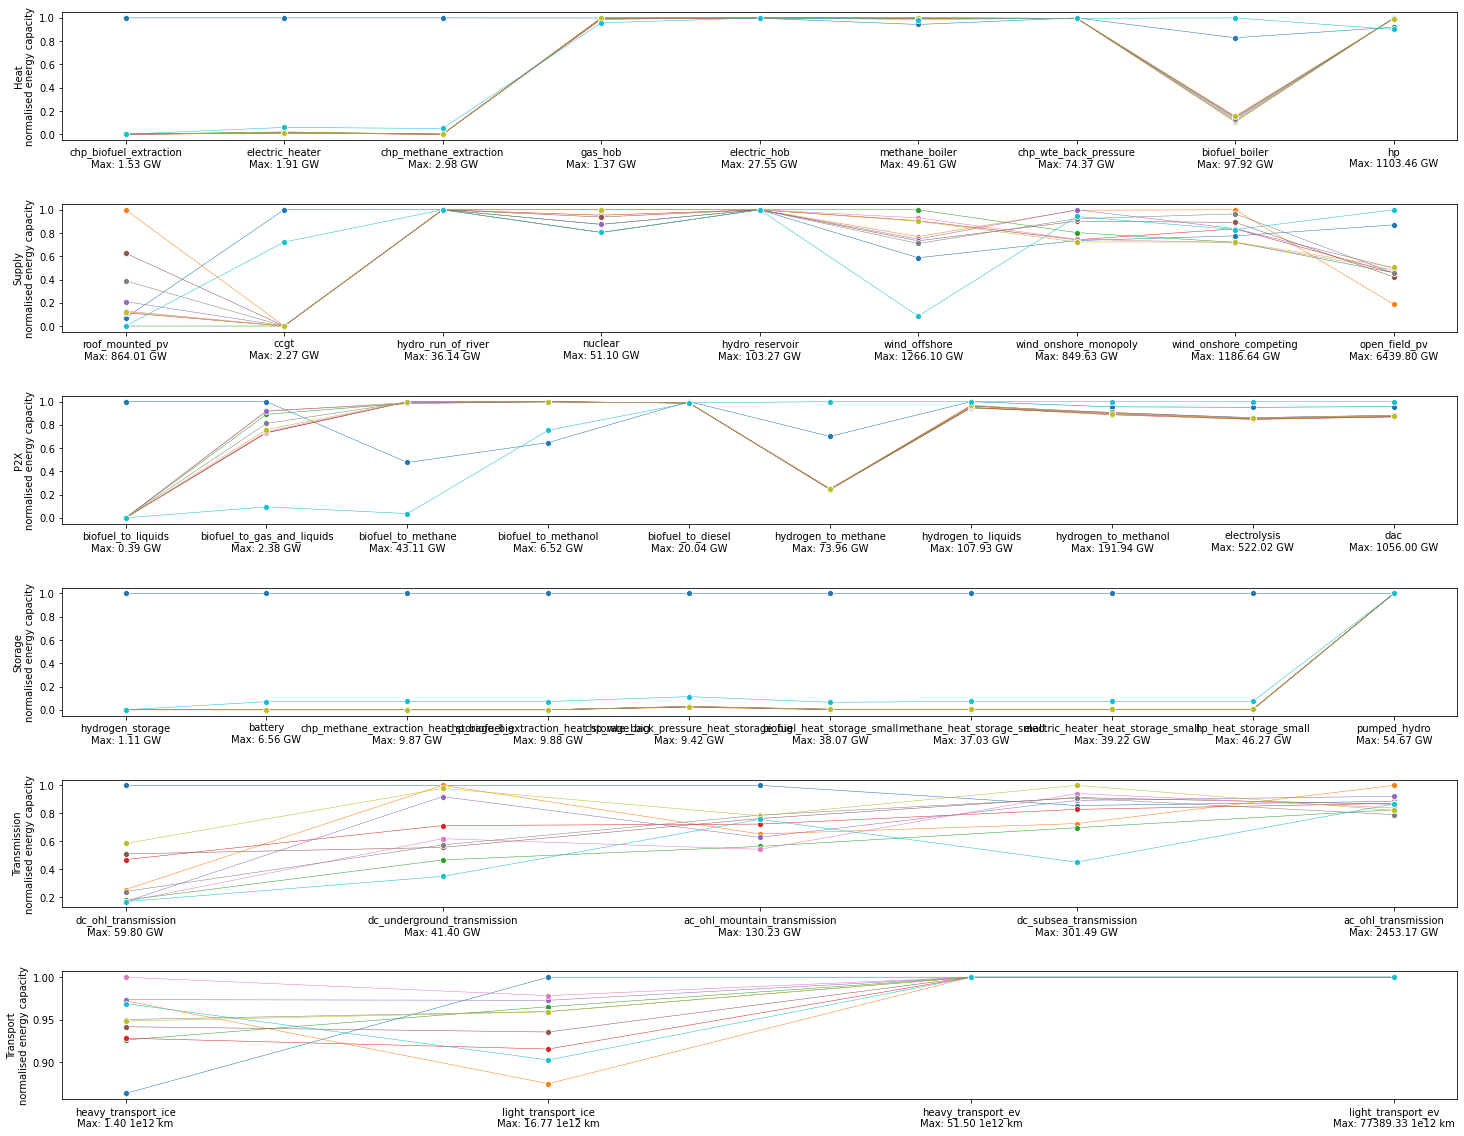

In [15]:
fig, ax = plt.subplots(len(tech_groups), 1, figsize=(25, 20), gridspec_kw={'hspace': 0.5})
_ax = 0
for tech_group_name, tech_group in tech_groups.items():
    energy_cap_slice = energy_cap.reindex(tech_group).dropna(how='all').sort_values('cost_opt')
    _df = (
        energy_cap_slice
        .div(energy_cap_slice.max(axis=1), axis=0)
        .rename_axis(index='techs')
        .stack()
        .to_frame('energy_cap')
        .reset_index()
    )
    
    sns.lineplot(data=_df, x='techs', y='energy_cap', hue='spores', ax=ax[_ax], marker='o', lw=0.5)
#    ax[_ax].set_title(tech_group_name)
    if 'transport' in tech_group_name:
        unit = '1e12 km'
    else:
        unit = 'GW'
    xlabels = [
        "{}\nMax: {:.2f} {}".format(tech, energy_cap_slice.max(axis=1).loc[tech] * 100, unit) 
        for tech in _df.techs.unique()
    ]
    handles, labels = ax[_ax].get_legend_handles_labels()
    ax[_ax].get_legend().remove()
    
    ax[_ax].set_ylabel(
        '{}\nnormalised energy capacity'.format(tech_group_name.title().split("_")[0])
    )
    ax[_ax].set_xticklabels(xlabels)
    ax[_ax].set_xlabel("")
    _ax += 1
#ax[_ax].axis('off')
#ax[_ax].legend(handles, labels, loc='center', bbox_to_anchor=(0.5, 0.5), ncol=5, frameon=False)

In [44]:
carrier_con = split_loc_techs(all_model_ds.carrier_con)
heat_from_p2x = (
    carrier_con
    .loc[{'techs': tech_groups['heat_techs'], 'carriers': ['methane']}]
    .sum(['carriers', 'locs', 'timesteps'])
).to_series()
heat_from_electricity = (
    carrier_con
    .loc[{'techs': tech_groups['heat_techs'], 'carriers': ['electricity']}]
    .sum(['locs', 'timesteps'])
).to_series()
transport_from_p2x = (
    carrier_con
    .loc[{'techs': tech_groups['transport_techs'], 'carriers': ['diesel']}]
    .sum(['carriers', 'locs', 'timesteps'])
).to_series()
transport_from_electricity = (
    carrier_con
    .loc[{'techs': tech_groups['transport_techs'], 'carriers': ['electricity']}]
    .sum(['locs', 'timesteps'])
).to_series()
flex_from_p2x = (
    carrier_con
    .loc[{'techs': ['ccgt', 'methane_storage', 'hydrogen_storage'], 'carriers': ['methane']}]
    .sum(['carriers', 'locs', 'timesteps'])
).to_series()
flex_from_electricity = (
    carrier_con
    .loc[{'techs': ['battery', 'pumped_hydro'], 'carriers': ['electricity']}]
    .sum(['locs', 'timesteps'])
).to_series()
storage_flex = (
    carrier_con
    .loc[{'techs': tech_groups['storage_techs']}]
    .sum(['carriers', 'locs', 'timesteps'])
).to_series()

techs_transmission = all_model_ds.loc_techs.to_index().str.split('::', expand=True).get_level_values(1).to_frame().filter(regex=(':'), axis=0).index.drop_duplicates()
transmission_flex = (
    carrier_con
    .loc[{'techs': techs_transmission}]
    .sum(['carriers', 'locs', 'timesteps'])
).to_series().div(2).unstack('spores')
transmission_flex.index = transmission_flex.index.str.split(':', expand=True)
transmission_flex = transmission_flex.groupby(level=0).sum().stack()

ValueError: Index contains duplicate entries, cannot reshape

<AxesSubplot:xlabel='carrier_con', ylabel='carrier_con'>

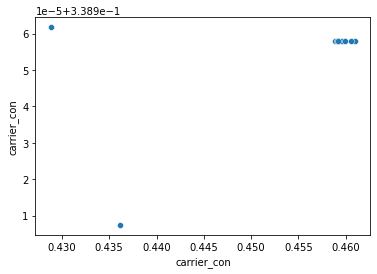

In [55]:
heat_elec_ratio = heat_from_electricity.sum(level='spores').div(carrier_con.loc[{'techs': 'demand_heat'}].sum(['carriers', 'locs', 'timesteps']))
transport_elec_ratio = transport_from_electricity.sum(level='spores').div(carrier_con.loc[{'techs': ['demand_light_transport', 'demand_heavy_transport']}].sum(['carriers', 'locs', 'timesteps', 'techs']))

sns.scatterplot(x=heat_elec_ratio, y=transport_elec_ratio)

<AxesSubplot:xlabel='carrier_con'>

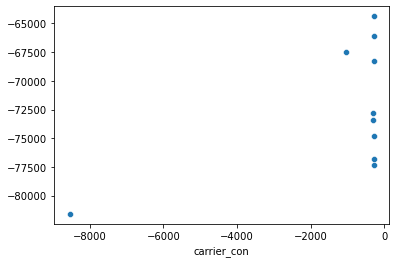

In [47]:
sns.scatterplot(x=storage_flex.sum(level='spores'), y=transmission_flex.sum(level='spores'))

In [56]:
carrier_con.loc[{'techs': ['demand_light_transport', 'demand_heavy_transport']}].sum(['carriers', 'locs', 'timesteps'])

<xarray.DataArray 'carrier_con' (spores: 10, techs: 2)>
array([[-38306.78218078,   -330.92368041],
       [-38306.78039528,   -330.92327202],
       [-38306.77603568,   -330.92227599],
       [-38306.77603451,   -330.92227555],
       [-38306.77603329,   -330.92227545],
       [-38306.78331213,   -330.92393844],
       [-38306.78255016,   -330.92376436],
       [-38306.78141572,   -330.92350515],
       [-38306.7796612 ,   -330.92310433],
       [-38306.77924356,   -330.9230089 ]])
Coordinates:
  * spores   (spores) object '5' '8' 'cost_opt' '0' '1' '6' '2' '7' '3' '4'
  * techs    (techs) object 'demand_light_transport' 'demand_heavy_transport'